In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Path to video and image files
video_path = 'task1.mp4'  # Replace with the path to your video
output_video_path = 'task1_output_sample.avi'

In [3]:
# Display name on video
name_text = "521H0320_LETRI"  # Replace with your name
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 255, 0)
font_thickness = 2
text_position = (10, 30)

In [4]:
# === Task 1: Video processing ===
cap = cv2.VideoCapture(video_path)  # Load video for processing
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Define codec for output video
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Get the frames per second from video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Get video frame width
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Get video frame height
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))  # Create a video writer for output



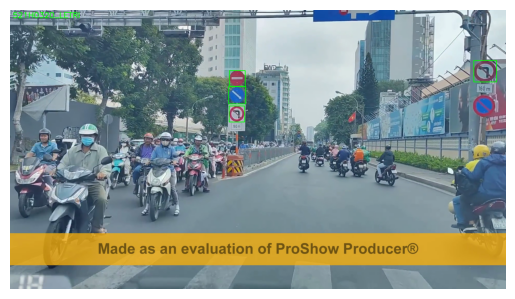

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()  # Read each frame
    if not ret:
        break  # Exit if no more frames

    # Light balance using CLAHE
    ycrcb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)  # Convert to YCrCb color space
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(4, 4))  # Create CLAHE object for brightness balance
    ycrcb_frame[:, :, 1] = clahe.apply(ycrcb_frame[:, :, 1])  # Apply CLAHE to the Y channel
    balanced_frame = cv2.cvtColor(ycrcb_frame, cv2.COLOR_YCrCb2BGR)  # Convert back to BGR color space

    # Convert to HSV color space
    hsv_frame = cv2.cvtColor(balanced_frame, cv2.COLOR_BGR2HSV)  # Convert to HSV for color masking
    hsv_frame = cv2.GaussianBlur(hsv_frame, (5, 5), 0)  # Apply Gaussian blur to reduce noise

    # Color threshold for blue traffic signs
    lower_blue1 = np.array([100, 100, 100])
    upper_blue1 = np.array([110, 255, 255])
    lower_blue2 = np.array([110, 100, 100])
    upper_blue2 = np.array([130, 255, 255])
    blue_mask1 = cv2.inRange(hsv_frame, lower_blue1, upper_blue1)  # Mask for light blue range
    blue_mask2 = cv2.inRange(hsv_frame, lower_blue2, upper_blue2)  # Mask for dark blue range
    blue_mask = cv2.bitwise_or(blue_mask1, blue_mask2)  # Combine both blue masks

    # Color threshold for red traffic signs
    lower_red1 = np.array([0, 120, 80])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 120, 80])
    upper_red2 = np.array([180, 255, 255])
    red_mask1 = cv2.inRange(hsv_frame, lower_red1, upper_red1)  # Mask for lower red range
    red_mask2 = cv2.inRange(hsv_frame, lower_red2, upper_red2)  # Mask for upper red range
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)  # Combine both red masks
    combined_mask = cv2.bitwise_or(blue_mask, red_mask)  # Combine blue and red masks

    # Remove small noises in the mask
    combined_mask = cv2.erode(combined_mask, None, iterations=1)
    combined_mask = cv2.dilate(combined_mask, None, iterations=2)
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Find contours

    output_frame = frame.copy()  # Make a copy for drawing

    for contour in contours:
        area = cv2.contourArea(contour)  # Calculate contour area
        if area > 2100:
            circularity = 4 * np.pi * (area / (cv2.arcLength(contour, True) ** 2))  # Calculate circularity
            x, y, w, h = cv2.boundingRect(contour)  # Get bounding box coordinates
            aspect_ratio = w / float(h)
            # Check if it matches a traffic sign shape and size
            if 0.65 < circularity < 1.35 and 0.8 < aspect_ratio < 1.2 and 30 <= w <= 100 and 30 <= h <= 100:
                cv2.rectangle(output_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box

    cv2.putText(output_frame, name_text, text_position, font, font_scale, font_color, font_thickness)  # Add name
    out.write(output_frame)  # Write frame to output video


    clear_output(wait=True)  # Xoá frame cũ để update frame mới
    plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
  
